# Matplotlib tutorial

The goal of this tutorial is to host code that I will likely be using either in my research right now or later in the future. It will contain content on creating colormaps, colorbars, contour plots, animations and other data visualization related code.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Colormaps and Colorbars

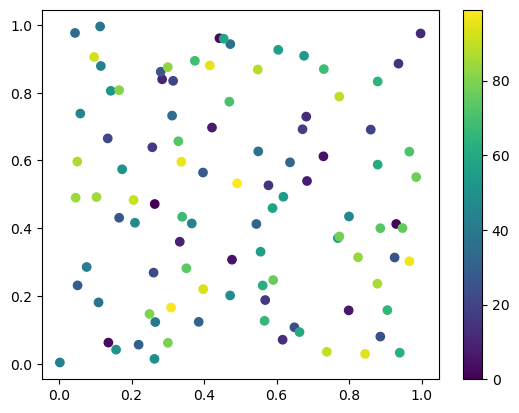

In [25]:
# Make a simple scatterplot with a colormap
# https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python

x = np.random.rand(100)
y = np.random.rand(100)
t = np.arange(100)

plt.scatter(x, y, c=t) # c is the color
plt.colorbar()
plt.show()

In [42]:
np.random.random((20, 20)) * (col + 1)

array([[1.15398074, 0.78238084, 1.60255479, 1.08103406, 0.08790595,
        1.42765321, 1.85060445, 0.61315606, 0.19491376, 1.34297234,
        0.47446702, 0.65799929, 0.20876598, 0.98346849, 0.48330519,
        0.72490686, 0.89302003, 0.99838027, 0.89597537, 0.73732481],
       [0.38943771, 0.37960965, 0.69801015, 1.19125507, 0.28517904,
        1.23369193, 1.09065408, 0.00481709, 0.33830894, 0.44346678,
        0.5016602 , 0.67024443, 0.0607279 , 1.47758682, 1.31287413,
        0.26849486, 0.81141944, 0.42998796, 0.25342674, 0.47970343],
       [1.05133823, 1.02043012, 1.93672952, 0.31904184, 0.38617868,
        1.61136365, 0.15051102, 0.7832811 , 0.17760239, 1.29490338,
        0.8880176 , 0.0773763 , 0.31824487, 0.56214626, 1.37105571,
        0.09500179, 1.609068  , 1.28266693, 1.25102948, 1.59309883],
       [0.04454038, 1.72479012, 0.12438511, 1.40400363, 1.56250843,
        1.81944625, 1.23570663, 1.05982652, 0.74015122, 1.10170164,
        0.21976918, 0.37304069, 1.96886429, 0

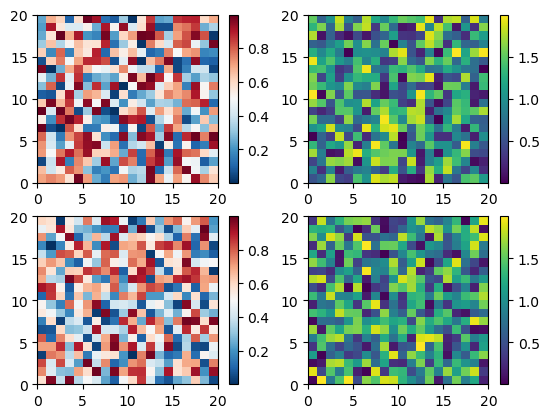

In [ ]:
## https://matplotlib.org/stable/users/explain/axes/colorbar_placement.html

np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1), # pcolormesh creates a pseudocolor plot with a non-regular rectangular grid
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

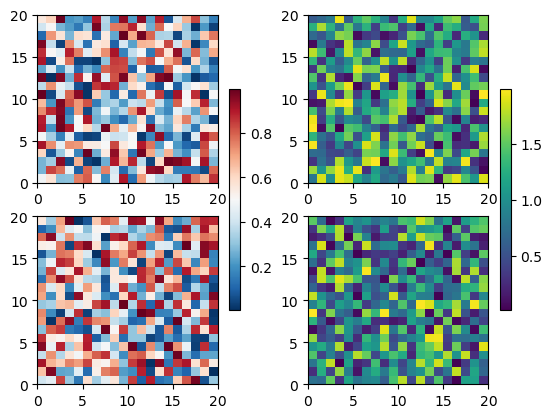

In [49]:
fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1), # pcolormesh creates a pseudocolor plot with a non-regular rectangular grid
                            cmap=cmaps[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)

## Manual Placement of colorbars

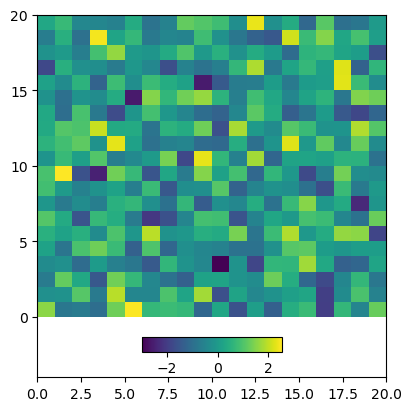

In [52]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')